
# Load libraries and data sets

In [3]:
# Load libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [12]:
# Load data set "energy consumption in household sector"

path = r'/Users/gomula/Documents/Finalproject'
consump_industry = pd.read_csv(os.path.join(path, '2 Data set', 'Original', 'ten00129_linear.csv','ten00129_linear.csv'), index_col=False)
consump_industry.head()

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEN00129(1.0),14/04/22 11:00:00,A,FC_IND_E,C0000X0350-0370,KTOE,AL,2009,98.149,NaN
1,ESTAT:TEN00129(1.0),14/04/22 11:00:00,A,FC_IND_E,C0000X0350-0370,KTOE,AL,2010,108.549,NaN
2,ESTAT:TEN00129(1.0),14/04/22 11:00:00,A,FC_IND_E,C0000X0350-0370,KTOE,AL,2011,137.799,NaN
3,ESTAT:TEN00129(1.0),14/04/22 11:00:00,A,FC_IND_E,C0000X0350-0370,KTOE,AL,2012,76.049,NaN
4,ESTAT:TEN00129(1.0),14/04/22 11:00:00,A,FC_IND_E,C0000X0350-0370,KTOE,AL,2013,63.050,NaN


In [13]:
# remove redundant columns
consump_industry.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG', 'unit'], axis=1, inplace=True)

In [14]:
# define the name of columns
consump_industry.rename(columns={'geo': 'country-code', 'TIME_PERIOD': 'time-period', 'OBS_VALUE': 'value(KTOE)', 'nrg_bal': 'sector'}, inplace=True)

In [15]:
# define the codes of countries and fuels
country_codes = {'SK':'Slovakia', 'FI':'Finland', 'SE':'Sweden', 'IS':'Iceland','NO':'Norway', 'UK':'United Kingdom',
                 'ME': 'Montenegro','MK':'North Macedonia', 'GE':'Georgia', 'EU27_2020':'European Union - 27 countries (from 2020)', 
                 'AL':'Albania', 'RS':'Serbia', 'TR':'Turkey', 'BA':'Bosnia and Herzegovina', 'MD':'Moldova', 'UA':'Ukraine',  
                 'EA19':'Euro area - 19 countries (from 2015)', 'BE':'Belgium', 'BG':'Bulgaria', 'CZ':'Czechia', 'DK':'Denmark',
                 'DE':'Germany', 'EE':'Estonia', 'IE':'Ireland', 'EL':'Greece', 'ES': 'Spain', 'FR':'France', 'HR':'Croatia',
                 'IT':'Italy', 'CY':'Cyprus', 'LV':'Latvia', 'LT':'Lithuania', 'LU':'Luxembourg', 'HU':'Hungary', 'MT':'Malta',
                 'NL':'Netherlands', 'AT':'Austria', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SI':'Slovenia',
                 'EU28':'European Union - 28 countries (2013-2020)', 'LI':'Liechtenstein', 'CH':'Switzerland',
                 'XK':'Kosovo'}
len(country_codes)

45

In [16]:
# define the codes of fuels
energy_codes = {'TOTAL':'Total', 'G3000':'Natural gas','E7000':'Electricity', 'C0000X0350-0370':'Solid fossil fuels',
                'C0350-0370':'Manufactured gases', 'P1000':'Peat and peat products', 'S2000':'Oil shale and oil sands',
                'O4000XBIO':'Oil and petroleum products (excluding biofuel portion)', 'RA000':'Renewables and biofuels',
                'W6100_6220':'Non-renewable waste', 'N900H':'Nuclear heat', 'H8000':'Heat'}

len(energy_codes)



12

In [17]:
# define code of sectores
sect_codes = {'FC_IND_E':'industry'}

In [18]:
# replace country abbreviations by full name
consump_industry['country'] = list(map(country_codes.get, consump_industry['country-code'].tolist()))

In [19]:
# replace energy codes by complete name
consump_industry['energy-type'] = list(map(energy_codes.get, consump_industry['siec'].tolist()))

In [20]:
# replace sector abbreviations by full name
consump_industry['sector'] = list(map(sect_codes.get, consump_industry['sector'].tolist()))

In [21]:
# remove columns: siec & country
consump_industry.drop(['siec', 'country-code'], axis=1, inplace=True)

In [22]:
# put columns in order
consump_industry = consump_industry[['country', 'time-period', 'sector','energy-type', 'value(KTOE)']]
consump_industry.head()

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,industry,Solid fossil fuels,98.149
1,Albania,2010,industry,Solid fossil fuels,108.549
2,Albania,2011,industry,Solid fossil fuels,137.799
3,Albania,2012,industry,Solid fossil fuels,76.049
4,Albania,2013,industry,Solid fossil fuels,63.050


In [23]:
# shape of the dataset
consump_industry.shape

(5892, 5)

In [24]:
# data type of attributes
consump_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5892 non-null   object 
 1   time-period  5892 non-null   int64  
 2   sector       5892 non-null   object 
 3   energy-type  5892 non-null   object 
 4   value(KTOE)  5423 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 230.3+ KB


There is 469 null values in 'value(KTOE)'

In [25]:
# check for mixed data type in df_ords
for col in consump_industry.columns.tolist():
  weird = (consump_industry[[col]].applymap(type) != consump_industry[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (consump_industry[weird]) > 0:
    print (col + ' contains mixed data types')
  else:
    print (col + ' doesn\'t contain mixed data types')

country doesn't contain mixed data types
time-period doesn't contain mixed data types
sector doesn't contain mixed data types
energy-type doesn't contain mixed data types
value(KTOE) doesn't contain mixed data types


In [26]:
# descriptive statisctics
consump_industry.describe()

,time-period,value(KTOE)
count,5892.000000,5423.000000
mean,2014.568228,3294.459093
std,3.431053,16266.630174
min,2009.000000,0.000000
25%,2012.000000,0.000000
50%,2015.000000,140.809000
75%,2018.000000,1022.037500
max,2020.000000,244695.806000


the data distribution for time period is ok as it is the annual data, but in value(KTOE) there are lots of outliers which seems to be rational as they are the summation values

<Axes: ylabel='Frequency'>

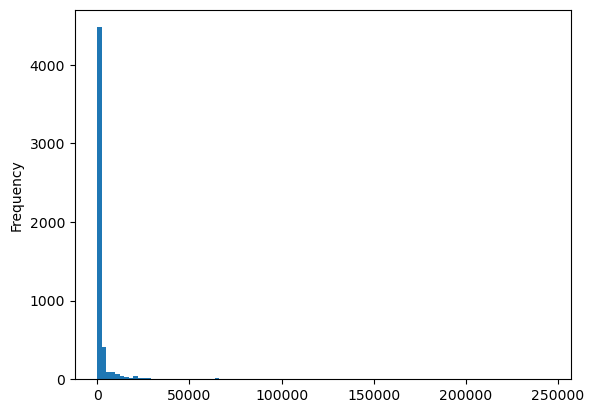

In [27]:
# distribution of value(KTOE)
consump_industry['value(KTOE)'].plot.hist(bins=100)


### Like the other data sets here we have lots of '0' values which seems to be normal as there are lots of unmeasured data or lots of real zero measurements

In [28]:
# value distribution for 'country'
consump_industry['country'].value_counts()

Albania                                      144
Iceland                                      144
Lithuania                                    144
Luxembourg                                   144
Latvia                                       144
Montenegro                                   144
North Macedonia                              144
Malta                                        144
Netherlands                                  144
Norway                                       144
Poland                                       144
Portugal                                     144
Romania                                      144
Serbia                                       144
Sweden                                       144
Slovenia                                     144
Slovakia                                     144
Turkey                                       144
Ukraine                                      144
Austria                                      144
Italy               

In [29]:
# data distribution for 'energy-type'
consump_industry['energy-type'].value_counts()

Solid fossil fuels                                        493
Manufactured gases                                        493
Electricity                                               493
Natural gas                                               493
Heat                                                      493
Oil and petroleum products (excluding biofuel portion)    493
Peat and peat products                                    493
Renewables and biofuels                                   493
Oil shale and oil sands                                   493
Total                                                     493
Non-renewable waste                                       493
Nuclear heat                                              469
Name: energy-type, dtype: int64

In [30]:
# data distribution for sector
consump_industry['sector'].value_counts()

industry    5892
Name: sector, dtype: int64

In [31]:
# remove rows related to 'EU27_2020' & 'EA19' & 'EA28' as they are summations for contries in EU and they are not helpful in our analysis
consump_industry.drop(consump_industry[consump_industry['country'].isin(['European Union - 27 countries (from 2020)',
            'Euro area - 19 countries (from 2015)', 'European Union - 28 countries (2013-2020)'])].index, inplace=True)
set(consump_industry['country'])

{'Albania',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Kosovo',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Turkey',
 'Ukraine',
 'United Kingdom'}

In [32]:
# check for null values again
consump_industry.isnull().sum()

country          0
time-period      0
sector           0
energy-type      0
value(KTOE)    469
dtype: int64

In [33]:
# to handle nulls we substitute them with zero
consump_industry.loc[consump_industry['value(KTOE)'].isnull(),'value(KTOE)']=0

In [34]:
# check for duplicity
consump_industry[consump_industry.duplicated()]

,country,time-period,sector,energy-type,value(KTOE)


There is no duplicated row

In [36]:
# reset index for new dataset
consump_industry.reset_index(drop=True, inplace=True)
consump_industry

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,industry,Solid fossil fuels,98.149
1,Albania,2010,industry,Solid fossil fuels,108.549
2,Albania,2011,industry,Solid fossil fuels,137.799
3,Albania,2012,industry,Solid fossil fuels,76.049
4,Albania,2013,industry,Solid fossil fuels,63.050
...,...,...,...,...,...
5623,Kosovo,2016,industry,Non-renewable waste,0.000
5624,Kosovo,2017,industry,Non-renewable waste,0.000
5625,Kosovo,2018,industry,Non-renewable waste,0.000
5626,Kosovo,2019,industry,Non-renewable waste,0.000


# The final form of the 'consum_industry' data frame will be as follow

In [37]:
consump_industry.head()

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,industry,Solid fossil fuels,98.149
1,Albania,2010,industry,Solid fossil fuels,108.549
2,Albania,2011,industry,Solid fossil fuels,137.799
3,Albania,2012,industry,Solid fossil fuels,76.049
4,Albania,2013,industry,Solid fossil fuels,63.050


In [38]:
consump_industry.shape

(5628, 5)

In [39]:
consump_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5628 entries, 0 to 5627
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5628 non-null   object 
 1   time-period  5628 non-null   int64  
 2   sector       5628 non-null   object 
 3   energy-type  5628 non-null   object 
 4   value(KTOE)  5628 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 220.0+ KB


In [40]:
consump_industry.describe()

,time-period,value(KTOE)
count,5628.000000,5628.000000
mean,2014.571429,1353.440274
std,3.430031,4325.505803
min,2009.000000,0.000000
25%,2012.000000,0.000000
50%,2015.000000,80.087000
75%,2018.000000,652.226000
max,2020.000000,57409.744000


<Axes: ylabel='Frequency'>

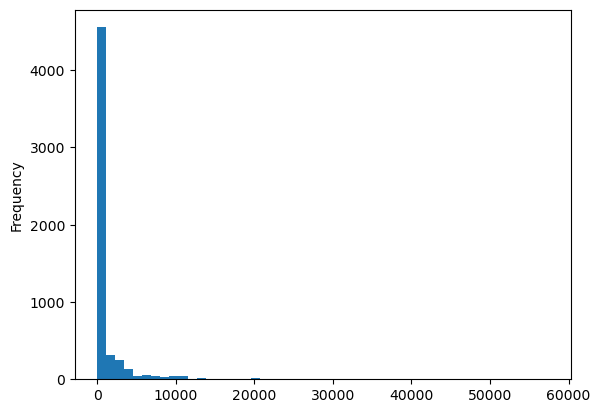

In [41]:
consump_industry['value(KTOE)'].plot.hist(bins=50)

In [42]:
# Save data set in pickle and csv formats
consump_industry.to_csv(os.path.join(path, '2 Data set', 'Modified', 'consump_industry.csv'))
consump_industry.to_pickle(os.path.join(path, '2 Data set', 'Modified', 'consump_industry.pkl'))